<a href="https://colab.research.google.com/github/Tahaa1995/CE888/blob/master/Lab_02/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	statistics=[]
	mean_samples=[]

	for i in range(n_iterations):
		sample = np.random.choice(data,size=sample_size,replace='TRUE')
		statistics.append(sample)
		mean_sample = np.mean(sample)
		mean_samples.append(mean_sample)

	data_mean=np.mean(statistics)
	mean_samples=np.sort(mean_samples)
	lower=np.percentile(mean_samples,2.5)
	upper=np.percentile(mean_samples,97.5)
	return data_mean, lower, upper

(0.0, 100000.0)

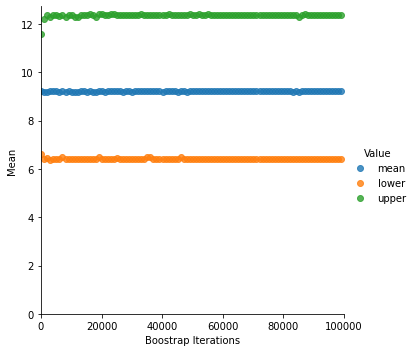

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(new_sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	statistics=[]
	mean_samples=[]
	
	for i in range(iterations):
		sample = np.random.choice(new_sample,size=sample_size,replace='TRUE')
		statistics.append(sample)
		mean_sample = np.nanmean(sample)
		mean_samples.append(mean_sample)
	
	data_mean=np.nanmean(statistics)
	mean_samples=np.sort(mean_samples)
	
	l=(100-ci)/2
	u=(100-l)
	lower=np.percentile(mean_samples,l)
	upper=np.percentile(mean_samples,u)
	
	return data_mean, lower, upper

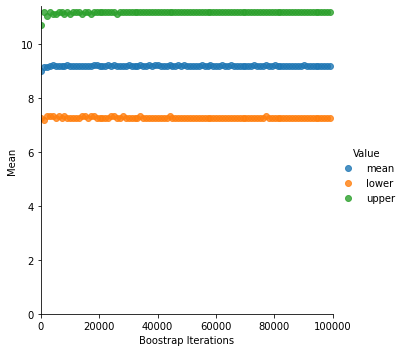

In [6]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [7]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv',sep=',')
cur_flt_data = df.values.T[0]
new_flt_data = df.values.T[1]
print(new_flt_data.shape)

(249,)


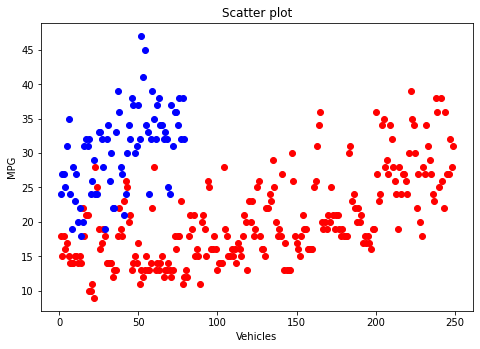

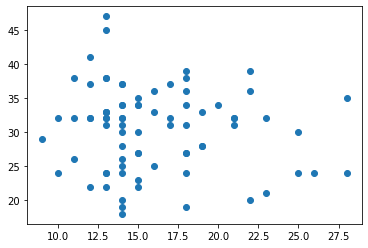

In [8]:
vrange=np.arange(1,250,1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(vrange, cur_flt_data, color='r')
ax.scatter(vrange, new_flt_data, color='b')
ax.set_xlabel('Vehicles')
ax.set_ylabel('MPG')
ax.set_title('Scatter plot')
plt.show()

plt.scatter(cur_flt_data, new_flt_data)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 5.,  5., 12.,  8., 20., 13., 11.,  3.,  0.,  2.]),
 array([18. , 20.9, 23.8, 26.7, 29.6, 32.5, 35.4, 38.3, 41.2, 44.1, 47. ]),
 <a list of 10 Patch objects>)

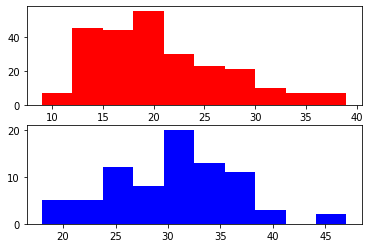

In [9]:
plt.subplot(2,1,1)
plt.hist(cur_flt_data, color='r')
plt.subplot(2,1,2)
plt.hist(new_flt_data, color='b')

In [10]:
n=np.array(new_flt_data)
c=np.array(cur_flt_data)

#Mean of current fleet
np.nanmean(cur_flt_data)

cur=boostrap_mean_ci(cur_flt_data, cur_flt_data.shape, 100, 95)
cur

#Mean of new fleet
np.nanmean(new_flt_data,)

new=boostrap_mean_ci(new_flt_data, new_flt_data.shape, 100, 95)
new

print(new_flt_data[0:79])

[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]


In [11]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

concat=np.concatenate(cur,new)

TypeError: ignored